## Lab 9: Solving higher order ODEs numerically

The methods we saw previously for solving ODEs numerically were for first order equations. Unfortunately, they don't carry over to higher order equations directly. Instead, we have to use a change of variables to translate the higher order differential equation into a system of first order equations. 

In general, if we have an $n$ th order differential equation, we can write it in the form 
\begin{equation}
    \frac{d^ny}{dt^n} = F\left(t,y,\frac{dy}{dt},...,\frac{d^{n-1}y}{dt^{n-1}}\right),
\end{equation}
I.e. the right hand side is some function of t,y, and almost all of the derivatives of y. The trick we use then is to create $n-1$ new variables to get from an $n$th order differential equation, to a system of $n$ differential equations. We do this by letting $z_j(t) = \frac{d^{j-1}y}{dt^{j-1}}$ for $j = 1,...,n$. Then by construction we have $\frac{dz_j}{dt} = z_{j+1}$ for $j = 1,...,n-1$ and $\frac{dz_n}{dt} = F(t,z_1,z_2,...,z_{n-1})$, which is a system of $n$ differential equations. If the original equation was linear, then this will be a system of linear equations. If the original equation was non-linear, this will be a non-linear system of equations. 

With a system of first order equations, we can use the same methods we discussed last week. In practice, the <code> scipy</code> package has many methods built into it for solving differential equations. The most commonly used one is the Runge-Kutta 4,5 method, which works very similar to the Trapezoid method we talked about last week, with a few extra bells and whistles. In this case, instead of a fixed time-step, the method actually figures out what the biggest timestep it can take without getting too far from the actual solution is (actually it does this by comparing the weighted average of 4 points to the right against the weighted average of 5 points and making sure that the difference is not too big).  

We can use the Runge-Kutta 4,5 method using the command <code> sp.integrate.solve_ivp(F,tspan,y0,t_eval)</code>, where <code>F</code> is the right hand side of the differential equation (as a vector), <code>tspan</code> is the starting and ending values of $t$, <code>y0</code> is the initial value of $(z_1,z_2,...,z_n)$, and <code>t_eval</code> is an optional list of values of $t$ to evaluate the solution at. This function returns a single object <code> sol</code>, which acts as a container for the $t$ values, the $y$ values, and information about how the solution was solved.  

#### Example

Consider the initial value problem 
$$ \frac{d^2y}{dt^2} + 2\frac{dy}{dt} + 2y = \cos(t), \qquad y(0) = 0,~~y'(0)= 1.$$
This is a 2nd order linear inhomogeneous equation with constant coefficients. We know how to solve this and we can find the exact solution to be $y(t) = \frac{1}{5}\left(2e^{-t}\sin(t)-e^{-t}\cos(t)+2\sin(t)+\cos(t)\right)$. We can use this solution to verify that the approximate solution we get using a change of variables and the RK45 method are correct. 

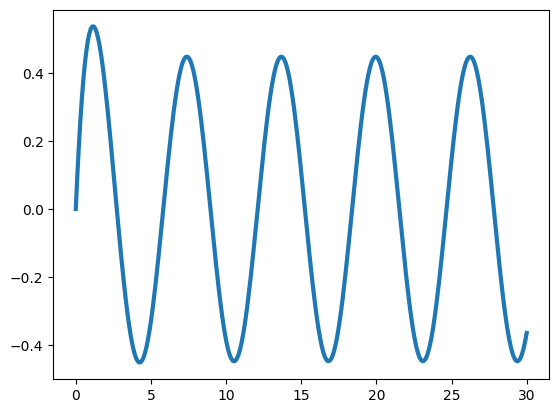

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

## Plot true solution
t = np.linspace(0,30,300)
def y_exact(t):
    return 1/5*(np.exp(-t)*(2*np.sin(t)-np.cos(t))+2*np.sin(t)+np.cos(t))
y = [y_exact(j) for j in t]
plt.plot(t,y,linewidth = 3, label = "True solution")



To convert this second order ode to a system of first order odes, we let $z_1(t) = y(t)$ and $z_2(t) = \frac{dy}{dt}$, then we have the following equations,
\begin{align*}
    \frac{dz_1}{dt} &= z_2,\\
    \frac{dz_2}{dt} &= -2z_2-2z_1+\cos(t),
\end{align*}
with the initial conditions $z_1(0) = 0,~~z_2(0) = 1$. 

In order to use <code>scipy.integrate.solve_ivp</code> we need to make a function for the right hand side of this system. 

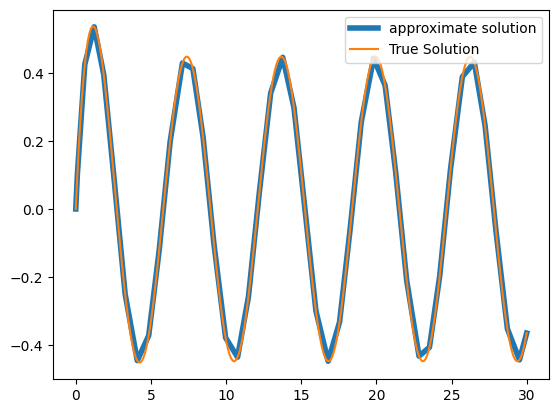

In [3]:
## Plot approximate solution
def F(t,z):
    return [z[1],
             -2*z[1]-2*z[0]+np.cos(t)] # Return a vector of changes
z0 = [0,1]
tspan = [0.0,30.0]
z = sp.integrate.solve_ivp(F,tspan,z0)

z.t ## t-values used to solve the ivp
z.y ## Values of y (z.y[0]) and y' (z.y[1])
plt.plot(z.t,z.y[0], linewidth = 4, label = "approximate solution") 
plt.plot(t,y, label = "True Solution")
plt.legend()


The numerical approximation looks really blocky compared to the true solution. If we investigate, we can see that the RK45 method only found a few points for our approximate solution. If we want it to find more so our solution looks smoother, we can include a vector of $t$-values for the in the solver to make things look more smooth.  

The ivp solver only used 45 points


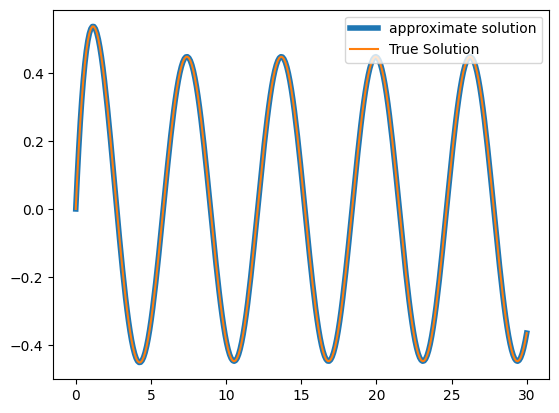

In [4]:
print(f"The ivp solver only used {len(z.t)} points")
z = sp.integrate.solve_ivp(F,tspan,z0,t_eval = t)
plt.plot(z.t,z.y[0],linewidth = 4, label = "approximate solution")
plt.plot(t,y,label = "True Solution")
plt.legend()

## Tasks
<b> Task 1 </b><br>
Find and plot the exact solution to the initial value problem 
\begin{equation}
 \frac{d^2y}{dt} + 2\frac{dy}{dt} + 5y = 0, \qquad y(0) = 0,~~ y'(0) = 1
\end{equation}
for $t\in(0,30)$. 

<b> Task 2 </b><br>
Convert the second order equation from task 1 into a system of two first order equations, one for $z_1 = y$ and one for $z_2 = dy/dt$. Create a function to compute the right hand side of this system, and use <code>scipy</code>'s ivp solver to plot an approximate solution. 

<b> Task 3</b><br>
It can be helpful to visualize solutions in the "phase plane", which is done by plotting $y$ vs $\frac{dy}{dt}$, or in terms of this system, $z_1$ vs $z_2$.

Create a direction field where your $u$ values are $\frac{dz_1}{dt}$ and your $v$ values are $\frac{dz_2}{dt}$. Plot the solution from task 2 over this direction field. In a markdown box, describe what you see.

<b>Task 4</b><br>
The following nonlinear second order ODE is called the Van der Pol equation
\begin{align*}
\frac{d^2y}{dt^2} - (1-y^2)\frac{dy}{dt} +y= 0. 
\end{align*}
We cannot find an explicit solution to this equation.

Instead, convert this equation to a system of first order equations and find an approximate solution $y(t)$ that satisfies $y(0) = 1,~~y'(0)=0$.

Plot $y(t)$ for $t\in(0,20)$

<b>Task 5</b><br>
Create a phase plot of the approximate solution you found in task 4 (similar to what you did in task 3). 
Find and plot approximate solutions with four other choices of initial conditions on your phase plot. In a markdown box, describe what you see.